In [23]:
#In this example, we have an example of EDA code - please feel free to get inspired.

# Note: the patient data obviously cannot be provided.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import pydot
import io

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline

In [3]:
colors = ["windows blue", "faded green", "greyish", "maroon", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
c3=sns.color_palette()[3]
c4=sns.color_palette()[4]

In [5]:
data = pd.read_csv('../data/data_all_no_encode.csv', low_memory=False);

In [7]:
# Define metrics to be determined for each column
metrics = []
metrics.append(data.apply(lambda x: np.count_nonzero(x), axis=0))
metrics.append(data.apply(lambda x: x.nunique(), axis=0))
metrics.append(data.apply(lambda x: x.isnull().sum(), axis=0))
metrics.append(data.apply(lambda x: (x==-1).sum(), axis=0))
metrics.append(data.apply(lambda x: (x==-4).sum(), axis=0))
metrics.append(data.apply(lambda x: x.isnull().sum() / len(x), axis=0))
metrics.append(data.dtypes)

# Summarize
col_summary = pd.concat(metrics, axis=1)
col_summary.columns = ['count non_zero','count_unique', 'count_null', 'count_missing_passive', 
                       'count_missing_confirmed', 'ppn_null', 'data_type']

In [8]:
col_summary.iloc[:50,:]

,count non_zero,count_unique,count_null,count_missing_passive,count_missing_confirmed,ppn_null,data_type
RID,12741,1737,0,0,0,0.000000,int64
VISCODE,12741,22,0,0,0,0.000000,object
PTID,12741,1737,0,0,0,0.000000,object
SITE,12741,62,0,0,0,0.000000,int64
D1,12671,2,0,0,0,0.000000,int64
D2,7660,2,0,0,0,0.000000,int64
COLPROT,12741,3,0,0,0,0.000000,object
ORIGPROT,12741,3,0,0,0,0.000000,object
EXAMDATE,12741,2688,0,0,0,0.000000,object
DX_bl,12741,5,0,0,0,0.000000,object


In [9]:
#Identify columns with a small number of missing values

cols = data.apply(lambda x: x.isnull().sum()/ len(x),axis = 0)<0.1
data.columns[cols]

Index(['RID', 'VISCODE', 'PTID', 'SITE', 'D1', 'D2', 'COLPROT', 'ORIGPROT',
       'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT',
       'PTRACCAT', 'PTMARRY', 'APOE4', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl',
       'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl',
       'Ventricles_bl', 'WholeBrain_bl', 'ICV_bl', 'Years_bl', 'Month_bl',
       'Month', 'M', 'PTHAND', 'PTWORK', 'PTWRECNT', 'PTNOTRT', 'PTRTYR',
       'PTHOME', 'PTTLANG', 'PTPLANG'],
      dtype='object')

In [ ]:
data.set_index(['RID'],inplace = True, verify_integrity = True)

In [12]:
#Focus on ADNI 1 group for the baseline model
data_1 = data.loc[(data.ORIGPROT=='ADNI1') & (data.VISCODE=='bl')]

In [24]:
data_1.shape

(819, 1388)

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


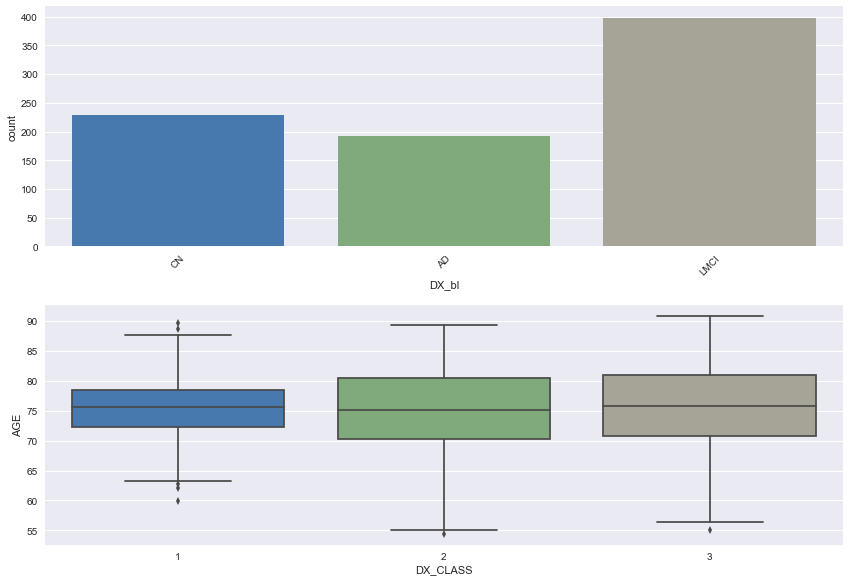

In [14]:
# Method to create diagnosis variable
def get_diagnosis(row):
    d=0
    if row in (1, 7, 9):
        d=1 #NL (cognitively normal)
    elif row in (2, 4, 8):
        d=2 #MCI (mild cognitive impairment)
    elif row in (3, 5, 6):
        d=3 #AD (Alzheimer's disease)
    return d

# Create variable
data_1['DX_CLASS'] = data_1.DXCHANGE.apply(get_diagnosis)

cols = ['DX_bl','DX_CLASS']

#plot count of baseline diagnosis and age distribution per change in diagnosis
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

ax = axes.ravel()
i = cols.index(cols[0])
sns.countplot(x=cols[0], data=data_1, ax=ax[0])
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)


plt.tight_layout()
sns.boxplot(x='DX_CLASS',y='AGE',data=data_1,ax=ax[1]);

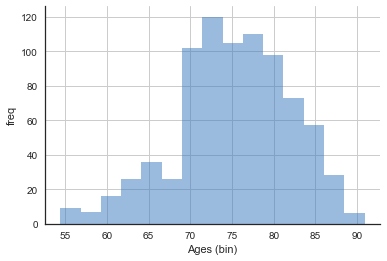

In [15]:
#Age distribution in ADNI 1

with sns.axes_style("white"):
    data_1.AGE.dropna().hist(bins=15,alpha=0.5)
    plt.xlabel("Ages (bin)");
    plt.ylabel("freq")
    sns.despine()

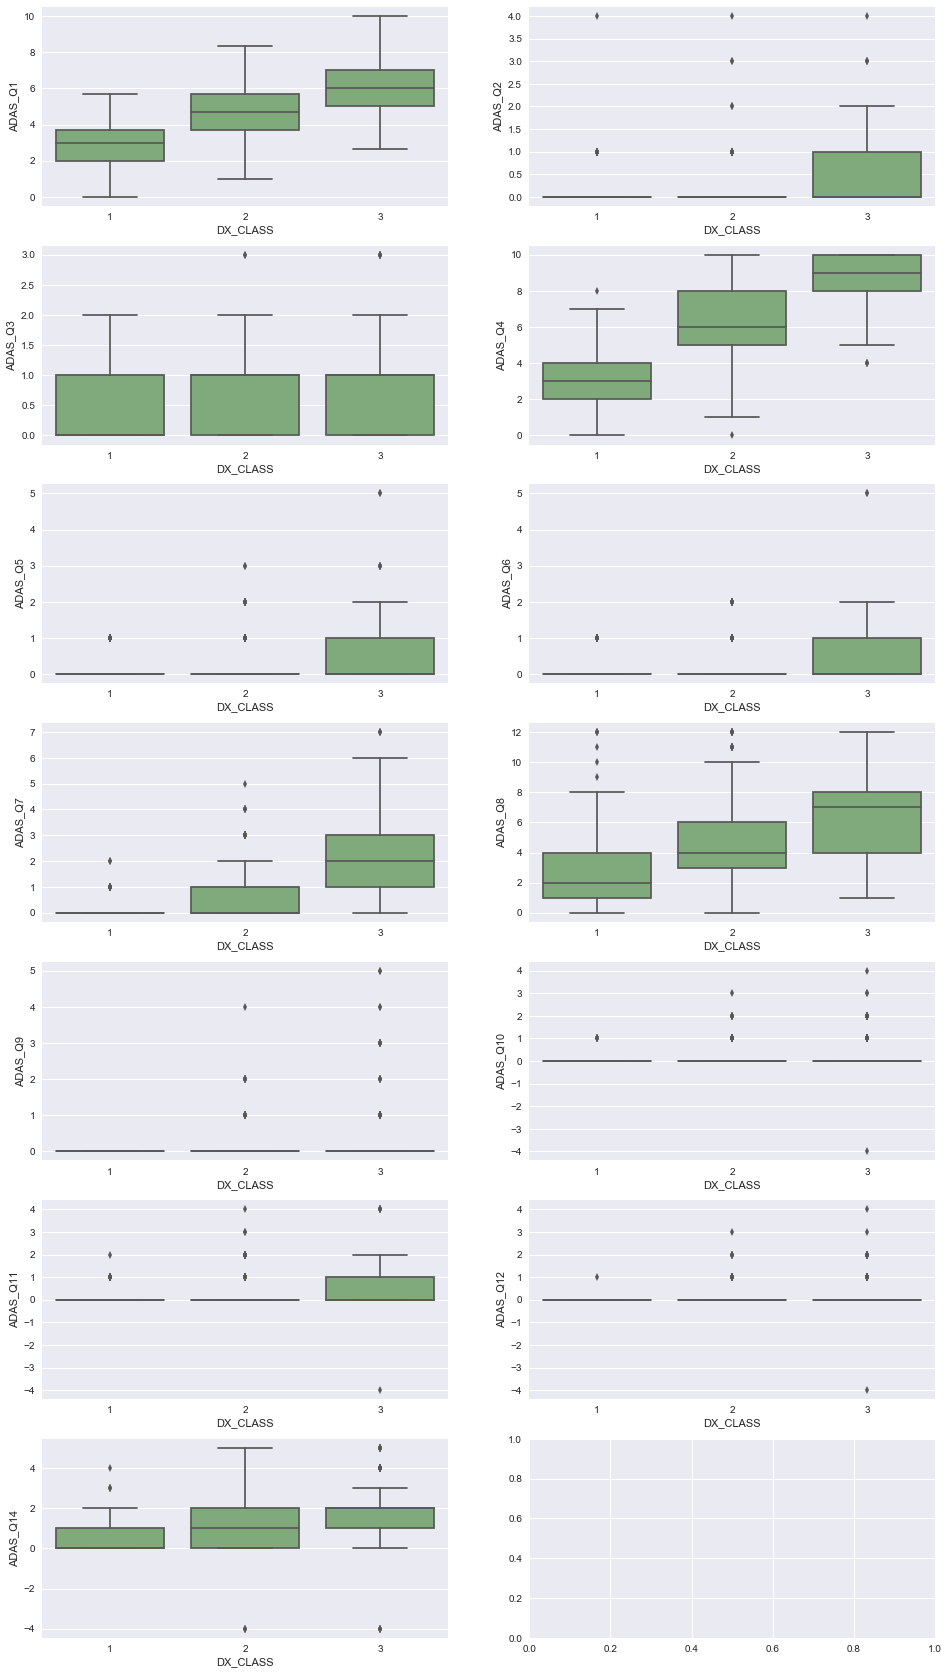

In [18]:
#Display distribution of different questions on the ADAS13 test

cols = list(data_1.loc[:,'ADAS_Q1':'ADAS_Q14'].columns)

fig, axes = plt.subplots(7, 2, figsize=(16, 30))
ax = axes.ravel()

for c in cols:
    i = cols.index(c)
    sns.boxplot(x="DX_CLASS", y=c, data=data_1, color=c1, ax=ax[i])
    
#plt.savefig("images\ADAS11_Indiv_Qs_Boxplot.png")

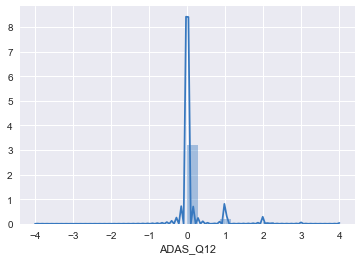

In [521]:
#Question 12 seems to have all 0's as answers
np.unique(data_1.ADAS_Q12.notnull(),return_counts=True)
sns.distplot(data_1.ADAS_Q12[~data_1.ADAS_Q12.isnull()]);

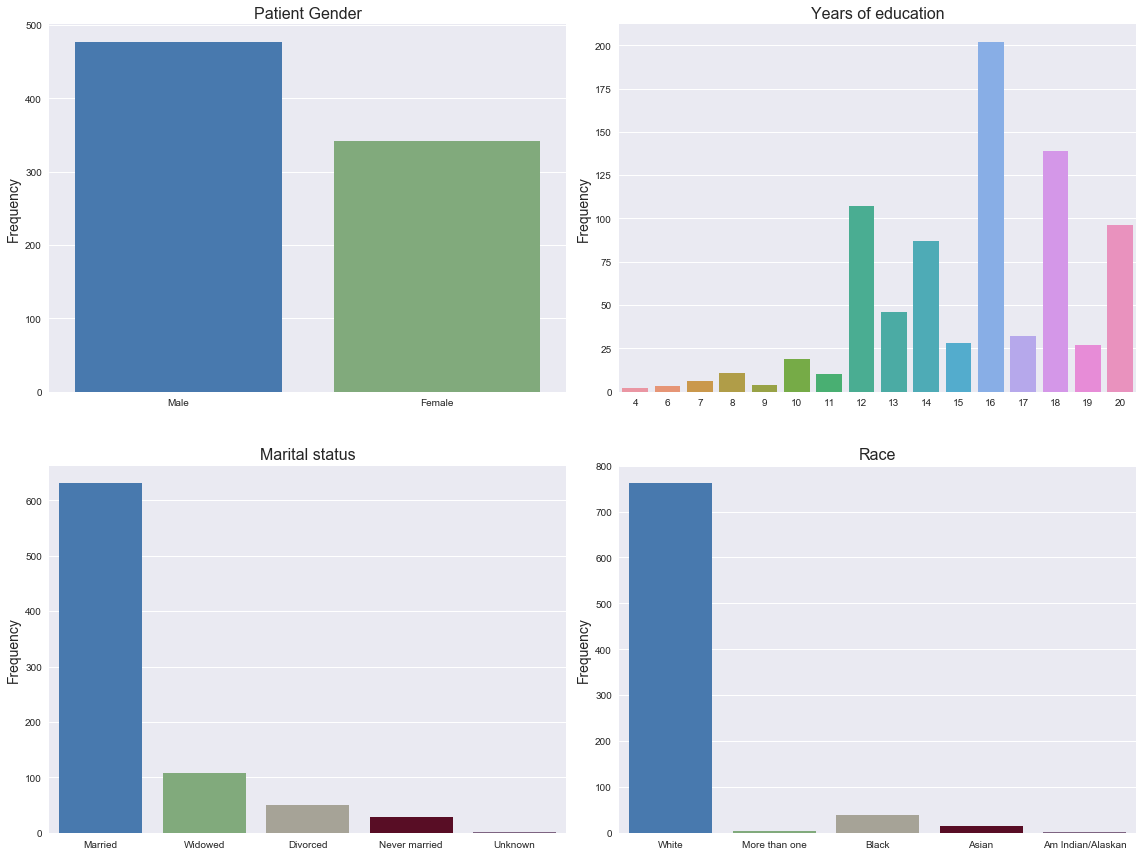

In [14]:
#Basic demographics

cols = ['PTGENDER','PTEDUCAT','PTMARRY','PTRACCAT',]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
ax = axes.ravel()

for c in cols:
    i = cols.index(c)
    sns.countplot(x = c, data=data_1,ax = ax[i])
    #sns.boxplot(x="DX_CLASS", y=c, data=data_1, color=c1, ax=ax[i])
    
ax[0].set_xlabel("", fontsize=14)
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].set_title("Patient Gender", fontsize=16)

ax[1].set_xlabel("", fontsize=14)
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_title("Years of education", fontsize=16)

ax[2].set_xlabel("", fontsize=14)
ax[2].set_ylabel("Frequency", fontsize=14)
ax[2].set_title("Marital status", fontsize=16)

ax[3].set_xlabel("", fontsize=14)
ax[3].set_ylabel("Frequency", fontsize=14)
ax[3].set_title("Race", fontsize=16)

plt.tight_layout(h_pad=4)
#plt.savefig("images\ADAS11_Indiv_Qs_Boxplot.png")

In [522]:
#get how many columns have missing values
data_1.columns[data_1.isnull().any()].shape,data_1.columns.shape

((1341,), (1388,))

In [523]:
#Identify columns with a small number of missing values
perc_nan = data.apply(lambda x: x.isnull().sum()/ len(x),axis = 0)
cols = (perc_nan <0.1) & (perc_nan !=0)
data.columns[cols]

Index(['APOE4', 'ADAS11_bl', 'ADAS13_bl', 'RAVLT_immediate_bl',
       'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl',
       'FAQ_bl', 'Ventricles_bl', 'WholeBrain_bl', 'ICV_bl', 'PTHAND',
       'PTWORK', 'PTWRECNT', 'PTNOTRT', 'PTRTYR', 'PTHOME', 'PTTLANG',
       'PTPLANG'],
      dtype='object')

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


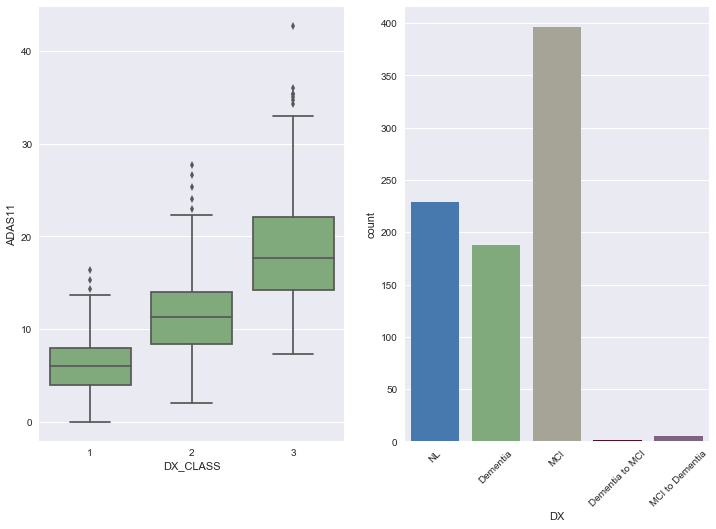

In [524]:
#Diagnose type vs ADAS score, count of different diagnoses
data_1.PTHAND.loc[data_1.PTHAND == -4] = np.nan

fig, axes = plt.subplots(1, 2, figsize=(12,8))
ax = axes.ravel()

sns.boxplot(x="DX_CLASS", y='ADAS11', data=data_1, color=c1, ax=ax[0])
    
sns.countplot(x=data_1.DX,ax=ax[1]);

for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)

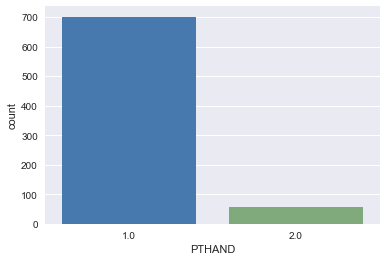

In [526]:
#coutn right-handed vs left-handed
sns.countplot(x=data_1.PTHAND.dropna());

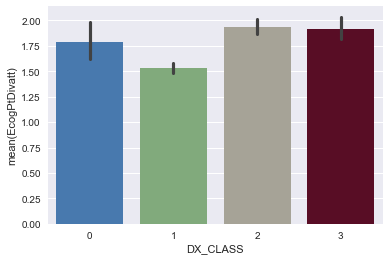

In [364]:
#EcogPtDivatt among classes - another cognitive test
sns.barplot(x=data_1.loc[data_1['EcogPtDivatt'].notnull()].DX_CLASS, y=data_1.loc[data_1['EcogPtDivatt'].notnull()].EcogPtDivatt)

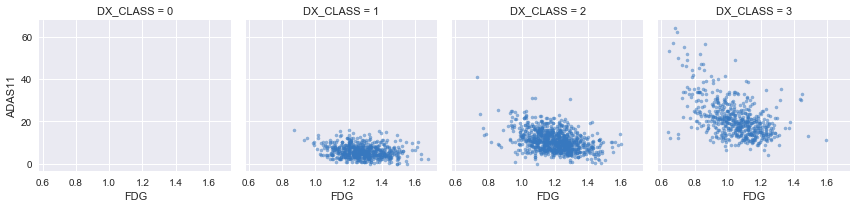

In [401]:
# Distribution for ADAS11 - a cognitive assesment test score in relation to FDG 
# which is a known risk indicator for Alzheimer's disease.
g = sns.FacetGrid(data_1, col='DX_CLASS', hue=None, palette="hot")
g.map(plt.scatter, 'FDG', 'ADAS11', alpha=0.5, s=10);

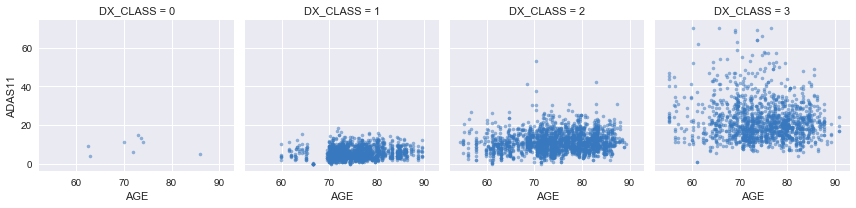

In [404]:
# Distribution for ADAS11 - a cognitive assesment test score in relation to age
g = sns.FacetGrid(data_1, col='DX_CLASS', hue=None, palette="hot")
g.map(plt.scatter, 'AGE', 'ADAS11', alpha=0.5, s=10);

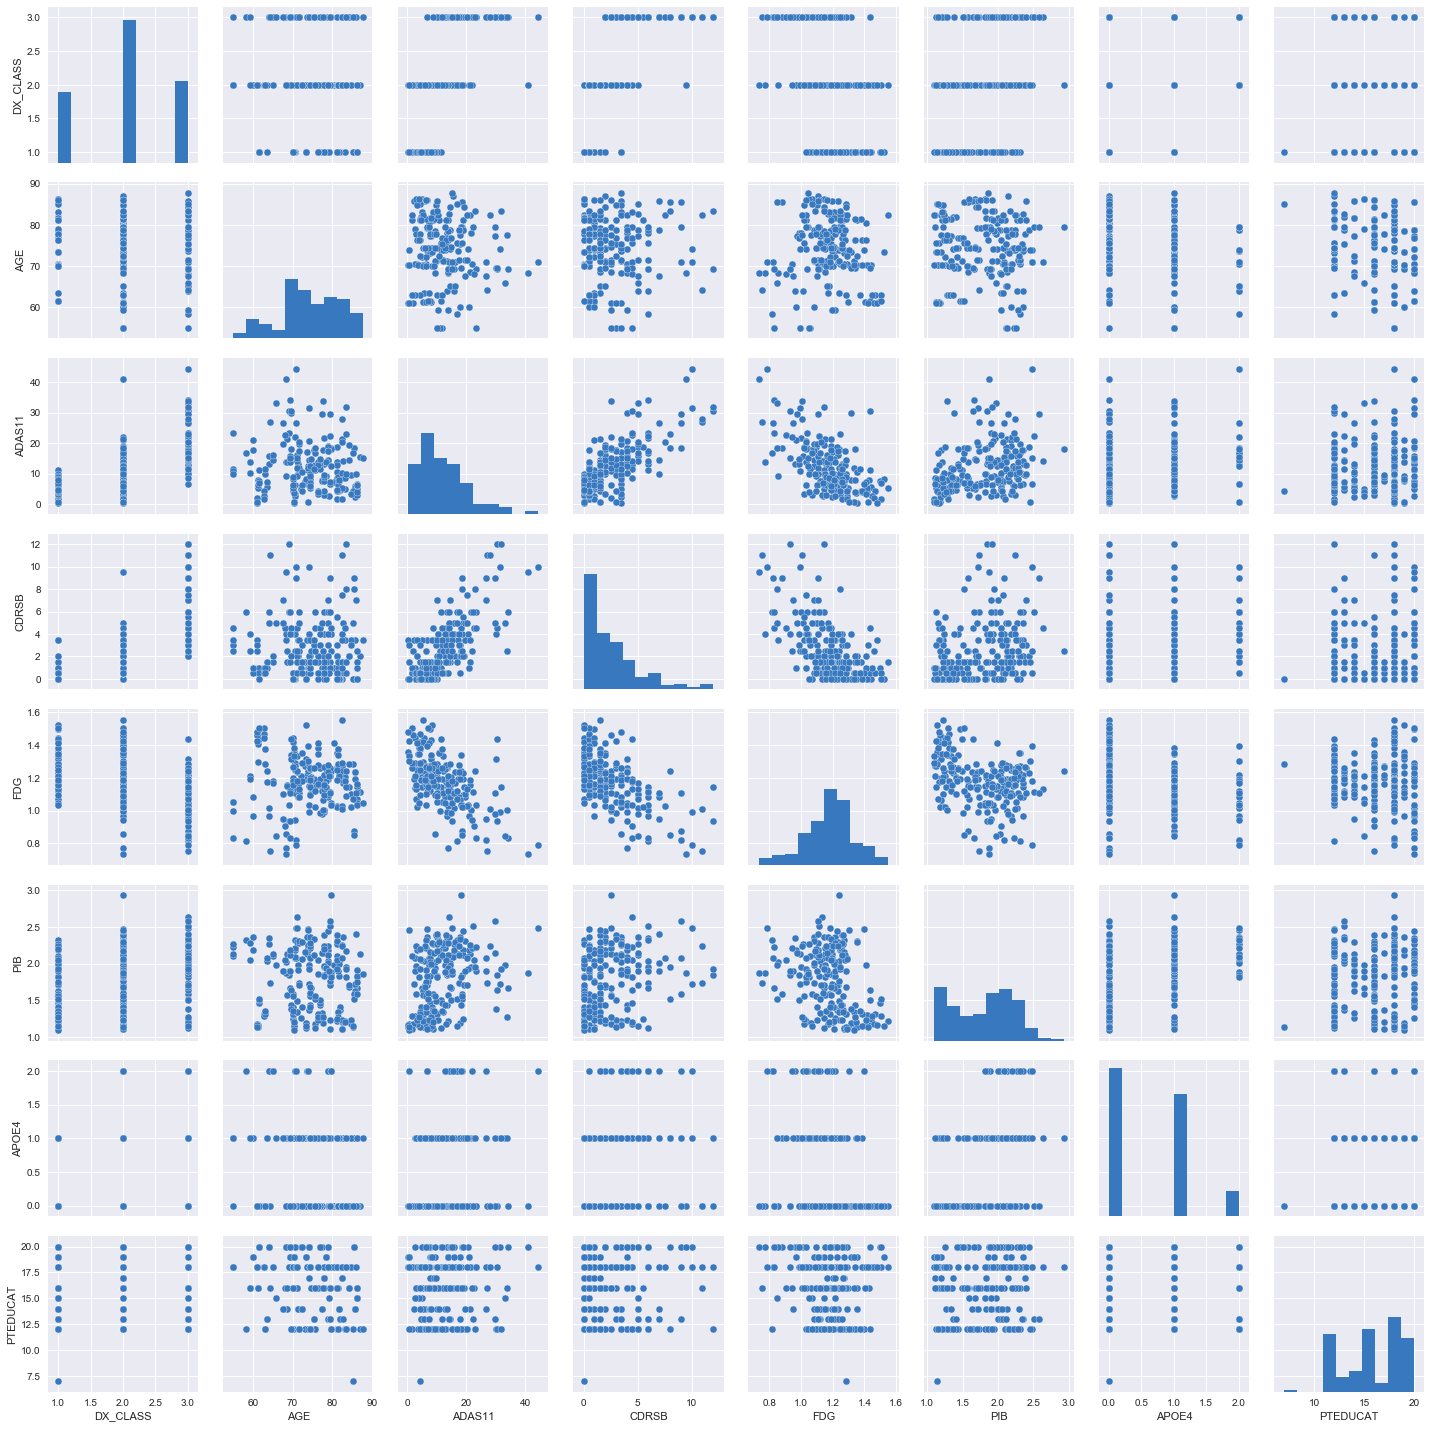

In [390]:
#plot some relationships
sns.pairplot(data_1[['DX_CLASS','AGE','ADAS11','CDRSB','FDG','PIB','APOE4','PTEDUCAT']].dropna())

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


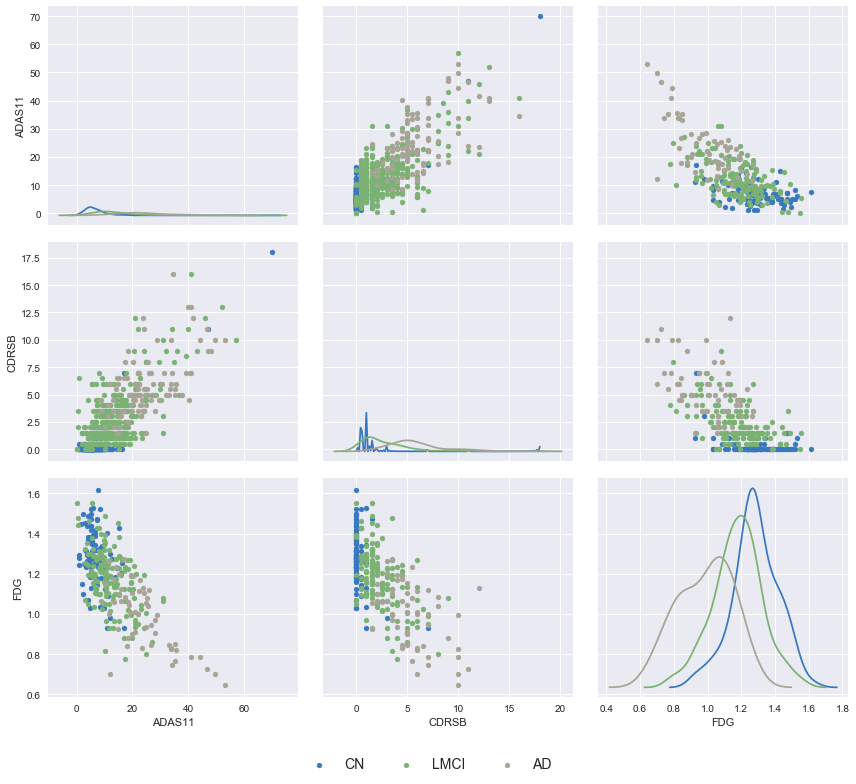

In [486]:
# Relationships between different congitive tests

cols = ['ADAS11','CDRSB','FDG']

g = sns.PairGrid(data_1.sample(1000, random_state=97), vars=cols, hue="DX_bl", size=4)
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=25)

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles, labels, loc="lower center", ncol=3, fontsize=14)
g.fig.subplots_adjust(top=0.9, bottom=0.1)

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


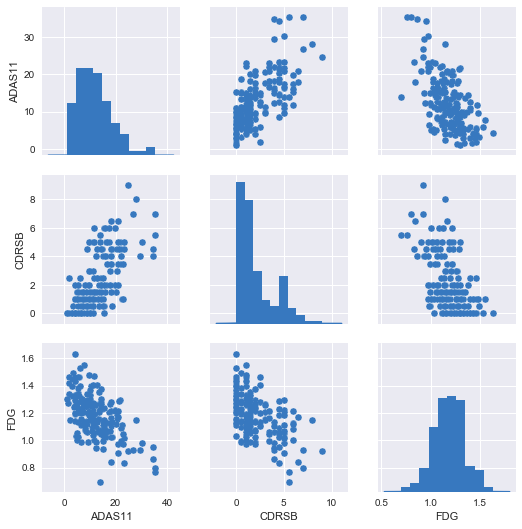

In [529]:
g = sns.pairplot(data_1[['ADAS11','CDRSB','FDG']].dropna().sample(200, random_state=97))
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=25);


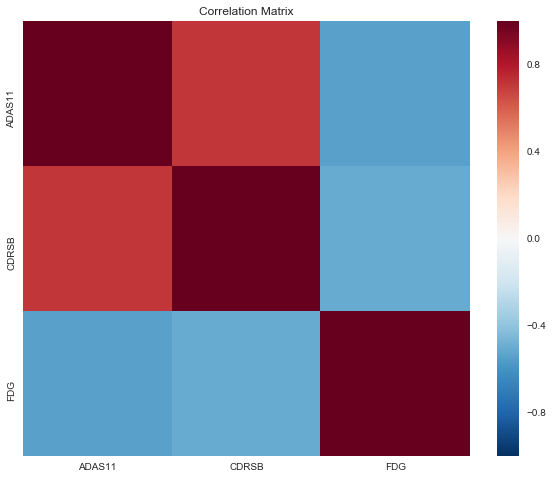

In [552]:
a=np.corrcoef(data_1[['ADAS11','CDRSB','FDG']].dropna().T)
plt.figure(figsize=(10,8))
sns.heatmap(a, xticklabels=['ADAS11','CDRSB','FDG'], yticklabels=['ADAS11','CDRSB','FDG'])
plt.title("Correlation Matrix");

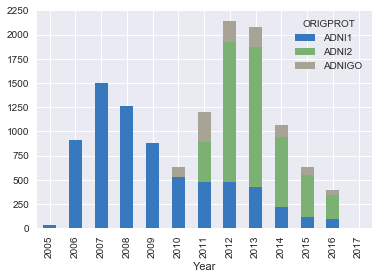

In [530]:
#there are multiple visits from each patient

data['Year'] = data["EXAMDATE"].apply(pd.to_datetime).apply(lambda x: x.year)

ct = pd.crosstab(data.Year,data.ORIGPROT)

ct.plot.bar(stacked=True)

In [22]:
# Read data
data_new = pd.read_csv('../data/data_all.csv', low_memory=False);

# Create 'year' variable
data_new['YEAR'] = data_new['EXAMDATE'].apply(lambda x: x[:4])

# Subset data to baseline observations for ADNI 1
data_new = data_new.loc[(data_new['VISCODE'] == "bl") & (data_new['ORIGPROT'] == "ADNI1"), :]

In [46]:
data_new.ABETA_UPENNBIOMK9_04_19_17.dropna().shape, data_new.DX_bl[~data_new.ABETA_UPENNBIOMK9_04_19_17.isnull()].shape

((396,), (396,))

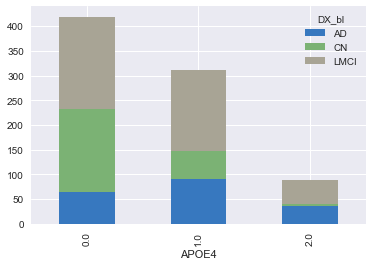

In [57]:
#Biomarker APOE4 accross different disease stages 

ct = pd.crosstab(data_new.APOE4,data.DX_bl)
ct.plot.bar(stacked=True)

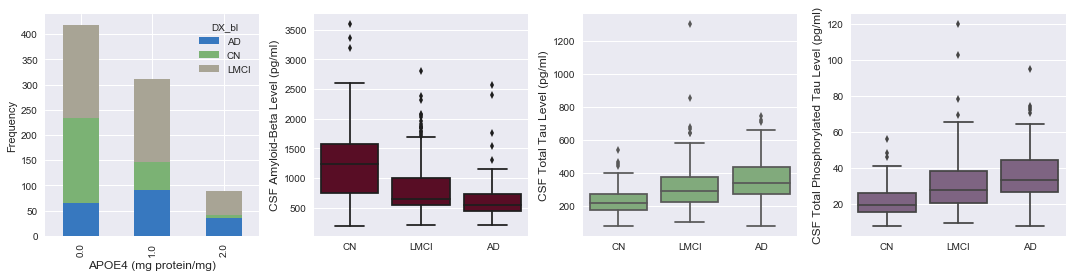

In [104]:
# 1) Plot of APOE4 across different disease stages
# 2) Plot of CSF Tau Biomarker across different disease stages
cols = ['APOE4','ABETA_UPENNBIOMK9_04_19_17','TAU_UPENNBIOMK9_04_19_17','PTAU_UPENNBIOMK9_04_19_17']

fig, axes = plt.subplots(1, 4, figsize=(15, 4))
ax = axes.ravel()

ct = pd.crosstab(data_new.APOE4,data.DX_bl)
ct.plot.bar(stacked=True,ax=ax[0])
ax[0].set_xlabel("APOE4 (mg protein/mg)",fontsize=12)
ax[0].set_ylabel("Frequency")
#ax[0].legend([""])
for c in cols[1:]:
    i = cols.index(c)
    #sns.countplot(x = c, data=data_1,ax = ax[i])
    if i == 1:
        sns.boxplot(x="DX_bl", y=c, data=data_new, color=c3,order=['CN',"LMCI","AD"], ax=ax[i])
        ax[i].set_ylabel("CSF Amyloid-Beta Level (pg/ml)",fontsize=12)
        ax[i].set_xlabel("")
    elif i == 2:
        sns.boxplot(x="DX_bl", y=c, data=data_new, color=c1,order=['CN',"LMCI","AD"], ax=ax[i])
        ax[i].set_ylabel("CSF Total Tau Level (pg/ml)",fontsize=12)
        ax[i].set_xlabel("")
    else:
        sns.boxplot(x="DX_bl", y=c, data=data_new, color=c4,order=['CN',"LMCI","AD"], ax=ax[i])
        ax[i].set_ylabel("CSF Total Phosphorylated Tau Level (pg/ml)",fontsize=12)
        ax[i].set_xlabel("")

plt.tight_layout()
#sns.boxplot(x="DX_bl", y='ABETA_UPENNBIOMK9_04_19_17', ,data=data_new, color=c1)
plt.savefig("images\Biomarkers_levels.png")